In [1]:
data <- read.csv("C:\\Users\\LENOVO\\Desktop\\creditcard.csv", header = TRUE,
                  stringsAsFactors = FALSE,
                  strip.white = TRUE ,
                  sep = ',')

In [3]:
table(data$Class)


     0      1 
284315    492 

In [2]:
library(caTools)
set.seed(123)

# Spliting data into training set and test set
split = sample.split(data$Class, SplitRatio = .8)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

#head(training_set)


In [4]:
#sclaing the fields
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])

In [8]:
#logistic regression on training data
logitmod <- glm(formula = Class ~ ., family = binomial, data = training_set)

In [9]:
#predicting the test set using(UNDER SAMPLING)
normal_prob <- predict(logitmod , type = 'response' , newdata = test_set[-31])
y_pred_normal <- ifelse(normal_prob >= 0.5, 1, 0)


In [10]:
#confusion matrix
table(test_set[, 31], y_pred_normal)

   y_pred_normal
        0     1
  0 56857     6
  1    42    56

In [11]:
summary(logitmod)


Call:
glm(formula = Class ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6123  -0.0292  -0.0194  -0.0125   4.6031  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.6560669  0.1606216 -53.891  < 2e-16 ***
Time        -0.0976624  0.1219003  -0.801 0.423035    
V1           0.1540449  0.0878861   1.753 0.079640 .  
V2           0.0215534  0.0981325   0.220 0.826155    
V3           0.0005932  0.0893346   0.007 0.994702    
V4           0.9571152  0.1107113   8.645  < 2e-16 ***
V5           0.1421909  0.1003754   1.417 0.156603    
V6          -0.1903205  0.1105375  -1.722 0.085111 .  
V7          -0.1332374  0.0844155  -1.578 0.114485    
V8          -0.1751599  0.0421216  -4.158 3.20e-05 ***
V9          -0.3869700  0.1304496  -2.966 0.003013 ** 
V10         -0.8517016  0.1071286  -7.950 1.86e-15 ***
V11         -0.0263651  0.0935021  -0.282 0.777964    
V12          0.0993695  0.096

In [35]:
roc_over <- roc.curve(test_set$Class, y_pred_normal, plotit = F)
print(roc_over)

Area under the curve (AUC): 0.786


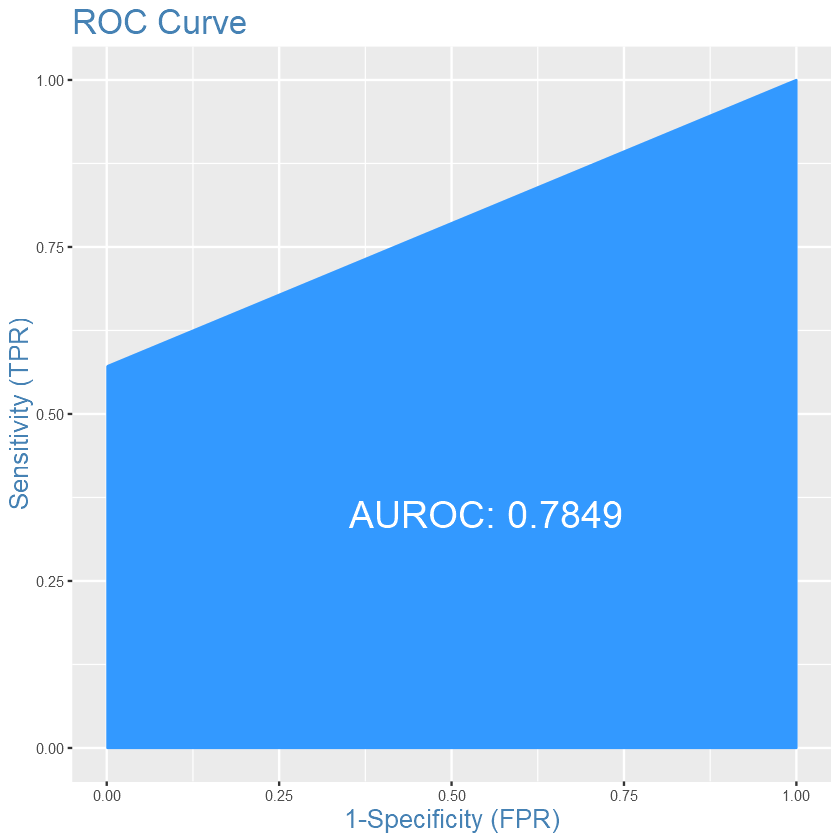

In [18]:
library(InformationValue)
print()
plotROC(test_set, y_pred_normal)    

In [19]:
#the data are less fraud less than 1% so we need to do sample to balance the data
library(DMwR)
library(ROSE)

print('Number of transactions in train dataset before applying sampling methods')
print(table(training_set$Class))

Loading required package: lattice
Loading required package: grid
Loaded ROSE 0.0-3



[1] "Number of transactions in train dataset before applying sampling methods"

     0      1 
227452    394 


[1] "Number of transactions in train dataset after applying Over sampling method"

     0      1 
227452 227452 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Area under the curve (AUC): 0.944


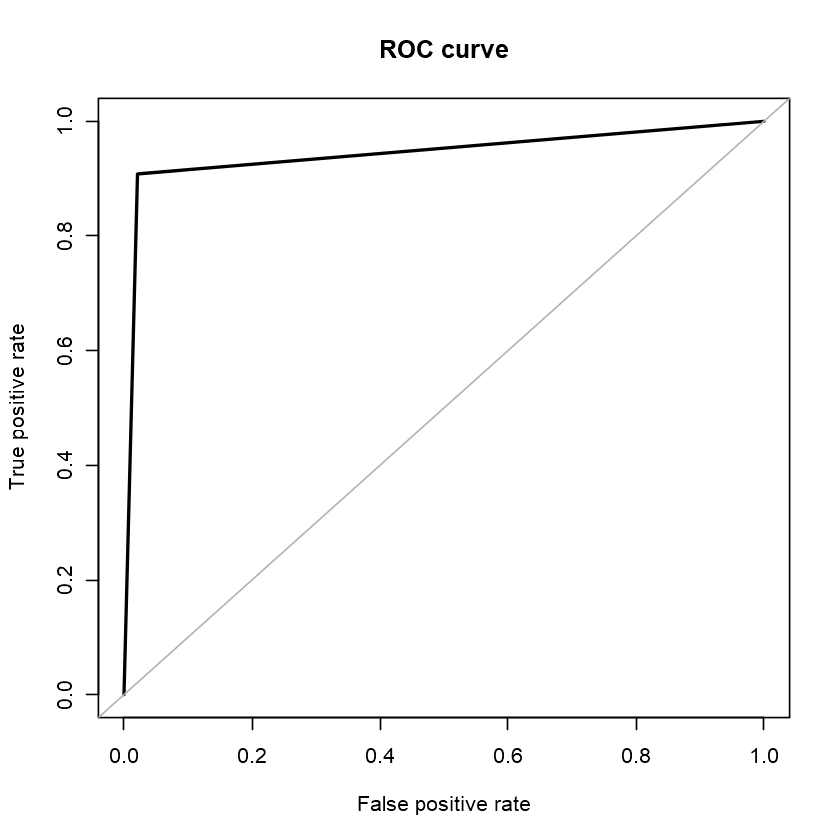

In [42]:
#Oversampling, as Fraud transactions(1) are having less occurrence, 
#so this Over sampling method will increase the Fraud records untill matches good records 227452  Here N= 227452*2
over_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="over", N=454904)$data
print('Number of transactions in train dataset after applying Over sampling method')
print(table(over_sample_train_data$Class))

# Logistic regression for Over sampling dataset
log_over = glm(formula = Class ~ ., family = binomial, data = over_sample_train_data)

over_probability_predict = predict(log_over, type = 'response', newdata = test_set[-31])
y_pred_over = ifelse(over_probability_predict>0.5, 1, 0)

roc_over <- roc.curve(test_set$Class, y_pred_over)
print(roc_over)

[1] "Number of transactions in train dataset after applying Under sampling method"

  0   1 
394 394 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Area under the curve (AUC): 0.938


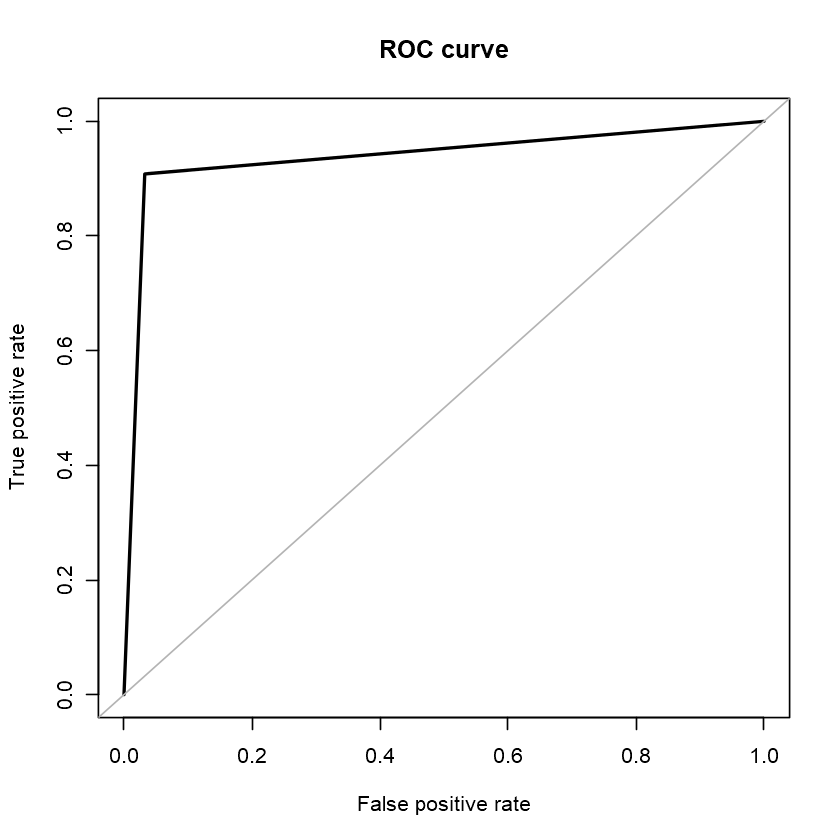

In [43]:
# Undersampling,as Fraud transactions(1) vice-versa to over sampling 
under_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="under", N=788)$data
print('Number of transactions in train dataset after applying Under sampling method')
print(table(under_sample_train_data$Class))

# Logistic regression for under sampling dataset
log_under = glm(formula = Class ~ ., family = binomial, data = under_sample_train_data)

under_probability_predict = predict(log_under, type = 'response', newdata = test_set[-31])
y_pred_under = ifelse(under_probability_predict>0.5, 1, 0)

roc_under <- roc.curve(test_set$Class, y_pred_under)
print(roc_under)

[1] "Number of transactions in train dataset after applying Mixed sampling method"

     0      1 
113630 114216 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Area under the curve (AUC): 0.944


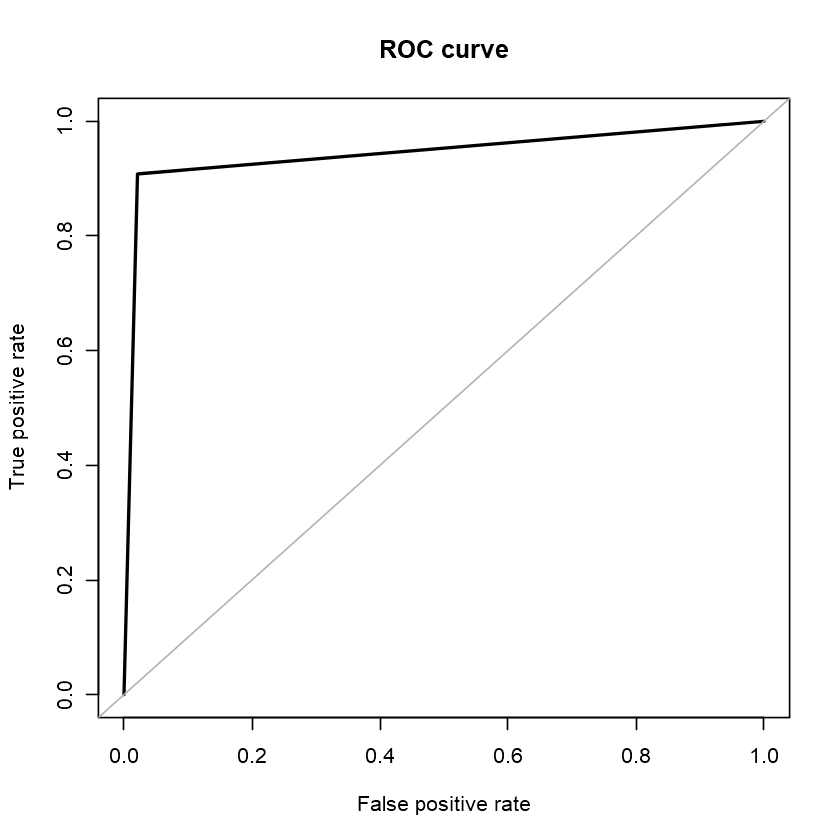

In [44]:
# Mixed Sampling, apply both under sampling and over sampling on this imbalanced data
both_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="both", p=0.5, seed=222, N=227846)$data
print('Number of transactions in train dataset after applying Mixed sampling method')
print(table(both_sample_train_data$Class))

log_both = glm(formula = Class ~ ., family = binomial, data = both_sample_train_data)

both_probability_predict = predict(log_both, type = 'response', newdata = test_set[-31])
y_pred_both = ifelse(both_probability_predict>0.5, 1, 0)

roc_both <- roc.curve(test_set$Class, y_pred_both)
print(roc_both)

[1] "Number of transactions in train dataset after applying ROSE sampling method"

     0      1 
113827 114019 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Area under the curve (AUC): 0.928


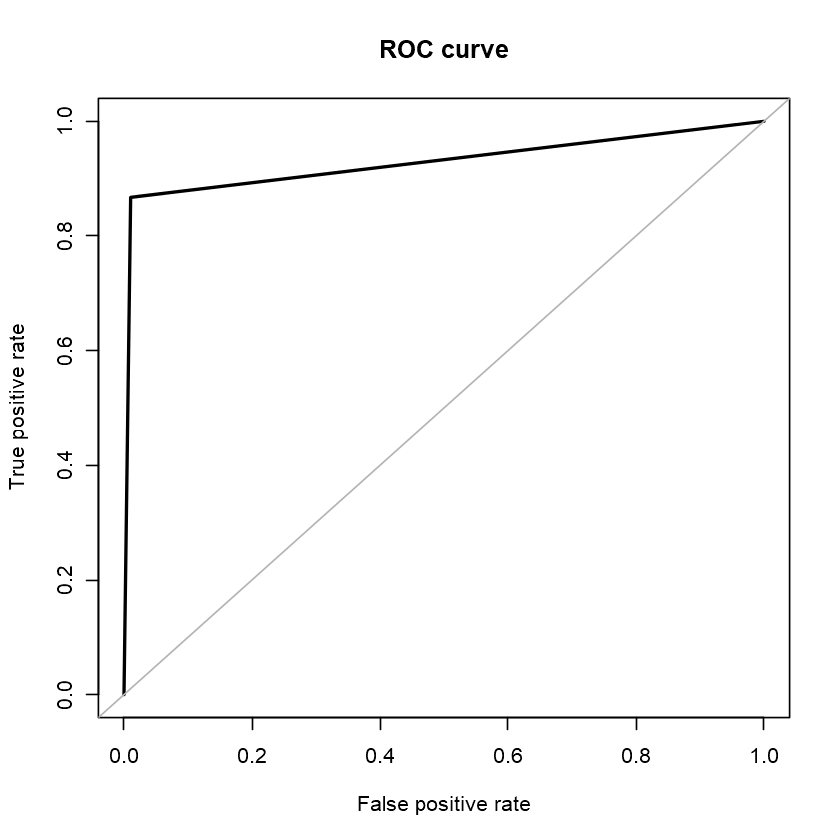

In [45]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
rose_sample_train_data <- ROSE(Class ~ ., data = training_set,  seed=111)$data
print('Number of transactions in train dataset after applying ROSE sampling method')
print(table(rose_sample_train_data$Class))

log_rose = glm(formula = Class ~ ., family = binomial, data = rose_sample_train_data)

rose_probability_predict = predict(log_rose, type = 'response', newdata = test_set[-31])
y_pred_rose = ifelse(rose_probability_predict>0.5, 1, 0)

roc_rose <- roc.curve(test_set$Class, y_pred_rose)
print(roc_rose)